# Generate and visualize a GTM model  (Generative Topographic Map) using numpy and sklearn.

In [1]:
# this is our module containing all functions to generate a GTM model (download uGTM.py from github)
import uGTM;
import numpy as np;
import time;
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets;
from sklearn.cluster import AgglomerativeClustering;
from sklearn.decomposition import PCA;
import mpl_toolkits.mplot3d.axes3d as p3;
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";

Two types of grids are generated to initialize the GTM model:
- the (square) grid of sample points (size = k*k)
- the (square) grid of RBF function centers (size = m*m)
Typically, m<k.

Two other parameters must be set to modulate the "smoothness" of the manifold:
- the regularization factor l 
- the RBF width factor s

For a total of four parameters: k, m, l, s.

The EM algorithm will optimize two "internal" parameters on its own:
- the inverse variance of the probability density function (betainv)
- the parameter (weight) matrix W


The data will be named "matT".
nMolecules is the number data points and nDimensions the dimensionality of the data.

Replace matT by your own data.

In [2]:
import csv
filenamedat = 'csvlist.dat'
filenamelbls = 'csvlist.lbls'
raw_data = open(filenamedat, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
matT = data
raw_labels = open(filenamelbls, 'rt')
reader = csv.reader(raw_labels, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('int')
label = data - 1

matT = sklearn.preprocessing.scale(matT,axis=0, with_mean=True, with_std=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(matT)
matT = scaler.transform(matT)

#matT2,label2 = sklearn.datasets.make_swiss_roll(n_samples=1000); 
matT2,label2 = sklearn.datasets.samples_generator.make_s_curve(1500, random_state=0)

matT = sklearn.preprocessing.scale(matT,axis=0, with_mean=True, with_std=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(matT)
matT = scaler.transform(matT)


#st = time.time()
#ward = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(matT)
#elapsed_time = time.time() - st
#label = ward.labels_ 
#print("Elapsed time: %.2fs" % elapsed_time)
#print("Number of points: %i" % label.size)



MinMaxScaler(copy=True, feature_range=(-1, 1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [3]:

#parameters;
k=15;
m=10;
l=0.0001;
s=1;


#initialModel: gaussian mixture and swiss roll
initialModel = uGTM.initiliaze(matT,k,m,s,l)
initialModel2 = uGTM.initiliaze(matT2,k,m,s,l)


#optimizedModel: gaussian mixture and swiss roll
optimizedModel = uGTM.optimize(matT,initialModel,l,1000)
optimizedModel2 = uGTM.optimize(matT2,initialModel2,l,1000)






('Iter ', 1, ' ErrorFunction (should go down): ', 1.2361718692986399)
('Iter ', 2, ' ErrorFunction (should go down): ', 0.85090562035576089)
('Iter ', 3, ' ErrorFunction (should go down): ', 0.78536562231550699)
('Iter ', 4, ' ErrorFunction (should go down): ', 0.75680056921821937)
('Iter ', 5, ' ErrorFunction (should go down): ', 0.73717220787238846)
('Iter ', 6, ' ErrorFunction (should go down): ', 0.71987100785153291)
('Iter ', 7, ' ErrorFunction (should go down): ', 0.70293587160784121)
('Iter ', 8, ' ErrorFunction (should go down): ', 0.68684287174094905)
('Iter ', 9, ' ErrorFunction (should go down): ', 0.67221266789121903)
('Iter ', 10, ' ErrorFunction (should go down): ', 0.65891934695048959)
('Iter ', 11, ' ErrorFunction (should go down): ', 0.64642504358982356)
('Iter ', 12, ' ErrorFunction (should go down): ', 0.63396081345555821)
('Iter ', 13, ' ErrorFunction (should go down): ', 0.62019195359248613)
('Iter ', 14, ' ErrorFunction (should go down): ', 0.60347957587791545)
('

# PLOT ORIGINAL VS PROJECTED DATA: mixture of gaussians

(-1.1156129032258064,
 1.1156129032258062,
 -1.1240397350993374,
 1.1240397350993379)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

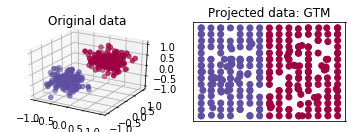

Computing LLE embedding
Done. Reconstruction error: 7.47196e-07


(-0.099146418069040301,
 0.019590689646921632,
 -0.26768000712590823,
 0.24598471042348488)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

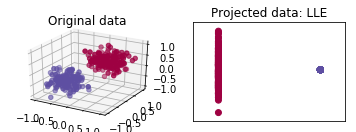

In [4]:
mm = optimizedModel.matMeans
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT[:, 0],matT[:, 1], matT[:, 2], c=label, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(mm[:, 0], mm[:, 1], c=label, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: GTM')
plt.show()

#compare with LLE

from sklearn import manifold

print("Computing LLE embedding")
matT_r, err = manifold.locally_linear_embedding(matT, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)


fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT[:, 0], matT[:, 1], matT[:, 2], c=label, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(matT_r[:, 0], matT_r[:, 1], c=label, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: LLE')
plt.show()

# PLOT ORIGINAL VS PROJECTED DATA: swiss roll (GTM doesn't unfold the swiss roll, LLE does (but not always))

(-1.1156129032258064,
 1.1156129032258062,
 -1.124036118159516,
 1.1240116660299913)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

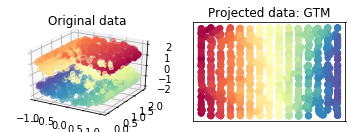

Computing LLE embedding
Done. Reconstruction error: 3.58862e-07


(-0.063163672047306274,
 0.064047722699898502,
 -0.070991511226853876,
 0.086598859519069982)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

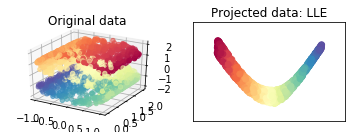

In [5]:
mm2 = optimizedModel2.matMeans
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT2[:, 0],matT2[:, 1], matT2[:, 2], c=label2, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(mm2[:, 0], mm2[:, 1], c=label2, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: GTM')
plt.show()


#compare with LLE

from sklearn import manifold
print("Computing LLE embedding")
matT2_r, err = manifold.locally_linear_embedding(matT2, n_neighbors=30,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT2[:, 0], matT2[:, 1], matT2[:, 2], c=label2, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(matT2_r[:, 0], matT2_r[:, 1], c=label2, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: LLE')
plt.show()